In [168]:
import pandas as pd

In [169]:
df = pd.read_csv("/Users/senthilpalanivelu/Desktop/google_analytics/all_invoices.csv")

In [170]:
print("1. BASIC DATA OVERVIEW")
print("-"*80)
print(f"Total Records: {len(df)}")
print(f"Total Columns: {len(df.columns)}")
print(f"\nColumn Names:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

print(f"\nData Types:")
print(df.dtypes)

1. BASIC DATA OVERVIEW
--------------------------------------------------------------------------------
Total Records: 98
Total Columns: 14

Column Names:
  1. PDF Filename
  2. Order Number
  3. Order Date
  4. Place of Delivery
  5. Invoice Number
  6. Invoice Value
  7. Description
  8. HSN Code
  9. ASIN
  10. SKU
  11. Payment Transaction ID
  12. Mode of Payment
  13. Date & Time
  14. Shipping Address

Data Types:
PDF Filename              object
Order Number              object
Order Date                object
Place of Delivery         object
Invoice Number            object
Invoice Value             object
Description               object
HSN Code                   int64
ASIN                      object
SKU                       object
Payment Transaction ID    object
Mode of Payment           object
Date & Time               object
Shipping Address          object
dtype: object


In [171]:
print(f"\nMissing Values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Missing Count'] > 0])


Missing Values:
                        Missing Count  Percentage
Payment Transaction ID             29   29.591837
Mode of Payment                    29   29.591837
Date & Time                        29   29.591837


In [172]:
# Clean Order Date
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d.%m.%Y', errors='coerce')
print(f"✓ Order Date converted to datetime")

✓ Order Date converted to datetime


In [173]:
# Clean Invoice Value
df['Invoice Value'] = pd.to_numeric(
    df['Invoice Value'].str.replace(',', '', regex=False),
    errors='coerce'
)
print(f"✓ Invoice Value converted to numeric")

✓ Invoice Value converted to numeric


In [174]:
# Extract date components
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['DayOfWeek'] = df['Order Date'].dt.day_name()
df['WeekOfYear'] = df['Order Date'].dt.isocalendar().week
print(f"✓ Date components extracted")

✓ Date components extracted


In [175]:
# Clean Place of Delivery
df['State'] = df['Place of Delivery'].str.strip().str.upper()
print(f"✓ State names standardized")


✓ State names standardized


In [176]:
print("\n\n3. DESCRIPTIVE STATISTICS")
print("-"*80)
print(f"\nInvoice Value Statistics:")
print(df['Invoice Value'].describe())



3. DESCRIPTIVE STATISTICS
--------------------------------------------------------------------------------

Invoice Value Statistics:
count      98.000000
mean      287.034694
std       186.148102
min       160.000000
25%       210.000000
50%       249.000000
75%       260.000000
max      1592.000000
Name: Invoice Value, dtype: float64


In [177]:
print(f"\nTotal Revenue: ₹{df['Invoice Value'].sum():,.2f}")


Total Revenue: ₹28,129.40


In [178]:
print("\n\n5. GEOGRAPHICAL ANALYSIS")
print("-"*80)

state_analysis = df.groupby('State').agg({
    'Invoice Value': ['count', 'sum']
}).round(6)

state_analysis.columns = ['Order Count', 'Total Revenue']
state_analysis = state_analysis.sort_values('Total Revenue', ascending=False)

print(f"\nState-wise Performance:")
print(state_analysis)



5. GEOGRAPHICAL ANALYSIS
--------------------------------------------------------------------------------

State-wise Performance:
                Order Count  Total Revenue
State                                     
TAMIL NADU               42        11838.0
KARNATAKA                15         3980.0
WEST BENGAL               7         1925.0
MAHARASHTRA               6         1724.0
GUJARAT                   2         1628.0
KERALA                    6         1565.0
TELANGANA                 6         1307.0
UTTAR PRADESH             3         1306.4
PUNJAB                    3          698.0
DELHI                     1          580.0
HARYANA                   2          489.0
ODISHA                    1          240.0
ANDHRA PRADESH            1          219.0
ASSAM                     1          210.0
RAJASTHAN                 1          210.0
UTTARAKHAND               1          210.0


In [179]:
print("\n\n6. TEMPORAL ANALYSIS")
print("-"*80)

# Monthly trend
monthly_analysis = df.groupby(['Year', 'Month']).agg({
    'Invoice Value': ['count', 'sum']
}).round(2)
monthly_analysis.columns = ['Order Count', 'Total Revenue']

print(f"\nMonthly Trend:")
print(monthly_analysis)



6. TEMPORAL ANALYSIS
--------------------------------------------------------------------------------

Monthly Trend:
            Order Count  Total Revenue
Year Month                            
2025 10               5         1726.4
     11              26         7469.0
     12              34        10389.0
2026 1               33         8545.0


In [180]:
df.groupby(['Year', 'Month'])['Invoice Value'].sum().reset_index()

,Year,Month,Invoice Value
0,2025,10,1726.4
1,2025,11,7469.0
2,2025,12,10389.0
3,2026,1,8545.0


In [181]:
df.groupby(['Year', 'Month'])['Invoice Value'].count().reset_index()

,Year,Month,Invoice Value
0,2025,10,5
1,2025,11,26
2,2025,12,34
3,2026,1,33


In [182]:
df.groupby(['Year', 'Month'])['Invoice Value'] \
  .agg(Order_Count='count', Total_Revenue='sum') \
  .reset_index()

,Year,Month,Order_Count,Total_Revenue
0,2025,10,5,1726.4
1,2025,11,26,7469.0
2,2025,12,34,10389.0
3,2026,1,33,8545.0


This code is used to create a **monthly summary** from a dataset.

* `df.groupby(['Year', 'Month'])`
  Groups the data by **Year** and **Month**, so all records from the same month and year are treated together.

* `['Invoice Value']`
  Selects the column on which calculations will be performed. After grouping, it prepares to perform calculations (aggregations) on the grouped data.

* `.agg(Order_Count='count', Total_Revenue='sum')`
  Performs two calculations for each Year–Month group:

  * **Order_Count**: counts how many invoice records (orders) exist in that month.
  * **Total_Revenue**: adds up all invoice values for that month.

* `.reset_index()`
  Converts `Year` and `Month` from row labels back into normal columns, making the result easier to read and use.

**In simple terms:**
This code produces a clean table that shows, for each month, **how many orders were placed** and **how much total revenue was generated**.


Monthly Trend:
            Order Count  Total Revenue
Year Month                            
2025 10               5         1726.4
     11              26         7469.0
     12              34        10389.0
2026 1               33         8545.0

✓ Improved line chart saved: simple_monthly_chart_improved.png

Monthly Summary:
Oct 2025: 5 orders, ₹1,726.40
Nov 2025: 26 orders, ₹7,469.00
Dec 2025: 34 orders, ₹10,389.00
Jan 2026: 33 orders, ₹8,545.00


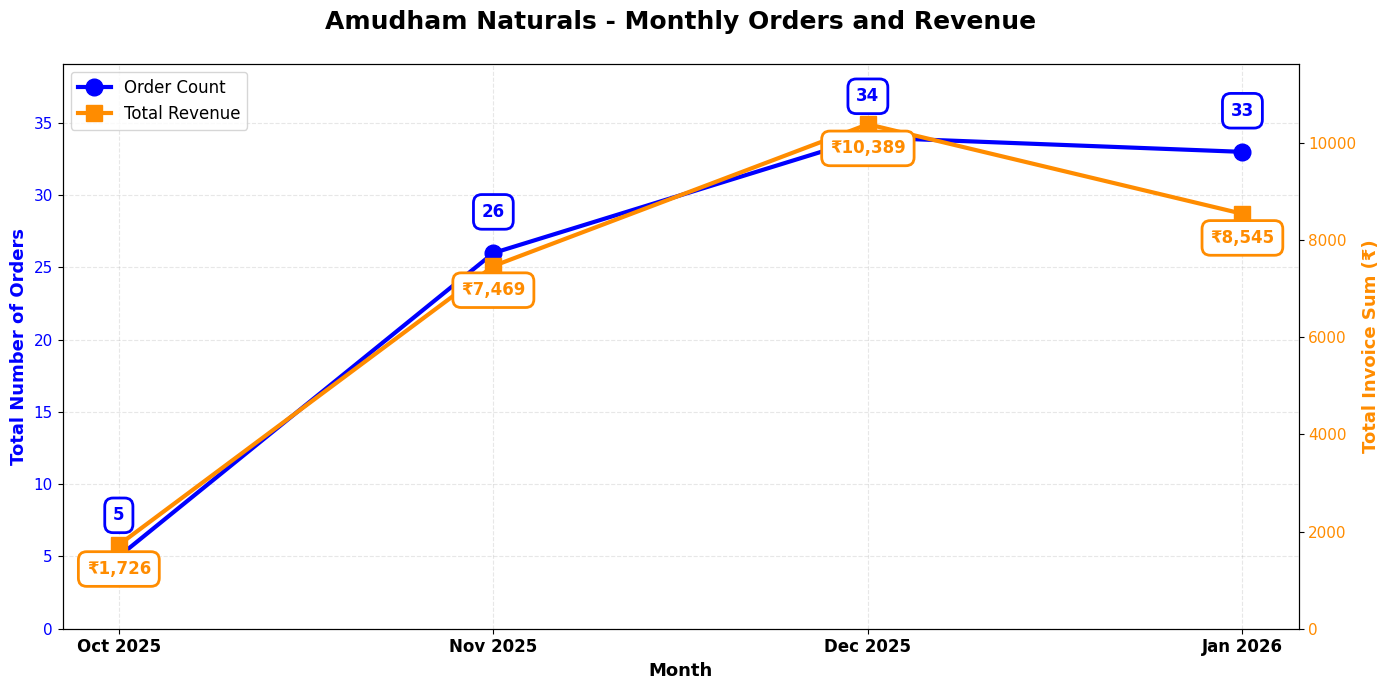

In [184]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv('/Users/senthilpalanivelu/Desktop/google_analytics/all_invoices.csv')
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d.%m.%Y', errors='coerce')
df['Invoice Value'] = pd.to_numeric(
    df['Invoice Value'].str.replace(',', '', regex=False),
    errors='coerce'
)
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Monthly trend
monthly_analysis = df.groupby(['Year', 'Month']).agg({
    'Invoice Value': ['count', 'sum']
}).round(2)
monthly_analysis.columns = ['Order Count', 'Total Revenue']

print("\nMonthly Trend:")
print(monthly_analysis)

# Create month labels
month_labels = []
for idx in monthly_analysis.index:
    year, month = idx
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_labels.append(f"{month_names[month-1]} {year}")

# Create simple line chart
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot orders on left axis (BLUE)
color1 = 'blue'
ax1.set_xlabel('Month', fontsize=13, fontweight='bold')
ax1.set_ylabel('Total Number of Orders', fontsize=13, fontweight='bold', color=color1)
line1 = ax1.plot(range(len(monthly_analysis)), monthly_analysis['Order Count'], 
                 color=color1, marker='o', linewidth=3, markersize=12, 
                 label='Order Count')
ax1.tick_params(axis='y', labelcolor=color1, labelsize=11)
ax1.set_xticks(range(len(monthly_analysis)))
ax1.set_xticklabels(month_labels, fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, linestyle='--')

# Add value labels for orders - positioned ABOVE the line
for i, v in enumerate(monthly_analysis['Order Count']):
    ax1.text(i, v + 2.5, str(int(v)), ha='center', fontsize=12, 
             fontweight='bold', color=color1,
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                      edgecolor=color1, linewidth=2))

# Plot revenue on right axis (ORANGE)
ax2 = ax1.twinx()
color2 = 'darkorange'
ax2.set_ylabel('Total Invoice Sum (₹)', fontsize=13, fontweight='bold', color=color2)
line2 = ax2.plot(range(len(monthly_analysis)), monthly_analysis['Total Revenue'], 
                 color=color2, marker='s', linewidth=3, markersize=12, 
                 label='Total Revenue')
ax2.tick_params(axis='y', labelcolor=color2, labelsize=11)

# Add value labels for revenue - positioned BELOW the line
for i, v in enumerate(monthly_analysis['Total Revenue']):
    ax2.text(i, v - 600, f'₹{v:,.0f}', ha='center', fontsize=12, 
             fontweight='bold', color=color2,
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                      edgecolor=color2, linewidth=2))

# Title
plt.title('Amudham Naturals - Monthly Orders and Revenue', fontsize=18, fontweight='bold', pad=25)

# Legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12, frameon=True)

# Add some padding to y-axes to prevent label cutoff
ax1.set_ylim(0, monthly_analysis['Order Count'].max() * 1.15)
ax2.set_ylim(0, monthly_analysis['Total Revenue'].max() * 1.12)

plt.tight_layout()
plt.savefig('/Users/senthilpalanivelu/Desktop/google_analytics/simple_monthly_chart_improved.png', dpi=300, bbox_inches='tight')
print("\n✓ Improved line chart saved: simple_monthly_chart_improved.png")

print("\n" + "="*60)
print("Monthly Summary:")
print("="*60)
for i, (idx, row) in enumerate(monthly_analysis.iterrows()):
    print(f"{month_labels[i]}: {int(row['Order Count'])} orders, ₹{row['Total Revenue']:,.2f}")
print("="*60)